# Load the data

In [1]:
# Import necessary packages
using DrWatson
using JLD2

# Activate the project environment
@quickactivate :FlowComplexity

# Define the file path
file_path = joinpath("./data/sims.02L/000100", "simulation.jld2")

# Load the data from the specified file
@load file_path sim

1-element Vector{Symbol}:
 :sim

In [2]:
using CSV, DataFrames

graph_df = CSV.read("./data/sims.02L/000100/graph.csv", DataFrame)

Row,destinations,source_inflow,sources
,Int64,Bool,Int64
1,2,true,1
2,6,true,1
3,1,false,2
4,3,false,2
5,7,false,2
6,2,false,3
7,4,false,3
8,8,false,3
9,3,false,4


In [3]:
using Graphs
using DataFrames

# Function to reconstruct a graph from edge lists
function reconstruct_graph(sources::Vector{Int}, destinations::Vector{Int})
    # Ensure the sources and destinations vectors have the same length
    if length(sources) != length(destinations)
        throw(ArgumentError("Sources and destinations must have the same length"))
    end

    # Find the number of unique nodes
    nodes = unique(vcat(sources, destinations))
    num_nodes = maximum(nodes)

    # Create an empty graph with the required number of nodes
    g = SimpleDiGraph(num_nodes)

    # Add edges to the graph
    for (src, dest) in zip(sources, destinations)
        add_edge!(g, src, dest)
    end

    return g
end

# Example usage
# sources = [1, 2, 3, 4]
sources = graph_df[:, "sources"]
# destinations = [2, 3, 4, 1]
destinations = graph_df[:, "destinations"]

graph = reconstruct_graph(sources, destinations)

# Print the graph
println(graph)

SimpleDiGraph{Int64}(80, [[2, 6], [1, 3, 7], [2, 4, 8], [3, 5, 9], [4, 10], [1, 7, 11], [2, 6, 8, 12], [3, 7, 9, 13], [4, 8, 10, 14], [5, 9, 15], [6, 12, 16], [7, 11, 13, 17], [8, 12, 14, 18], [9, 13, 15, 19], [10, 14, 20], [11, 17, 21], [12, 16, 18, 22], [13, 17, 19, 23], [14, 18, 20, 24], [15, 19, 25], [16, 22], [17, 21, 23], [18, 22, 24], [19, 23, 25], [20, 24]], [[2, 6], [1, 3, 7], [2, 4, 8], [3, 5, 9], [4, 10], [1, 7, 11], [2, 6, 8, 12], [3, 7, 9, 13], [4, 8, 10, 14], [5, 9, 15], [6, 12, 16], [7, 11, 13, 17], [8, 12, 14, 18], [9, 13, 15, 19], [10, 14, 20], [11, 17, 21], [12, 16, 18, 22], [13, 17, 19, 23], [14, 18, 20, 24], [15, 19, 25], [16, 22], [17, 21, 23], [18, 22, 24], [19, 23, 25], [20, 24]])


In [8]:
import Pkg; Pkg.add("GraphPlot")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IterTools ─ v1.10.0
   Installed Compose ─── v0.9.5
   Installed GraphPlot ─ v0.6.0
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Project.toml`
  [a2cc645c] + GraphPlot v0.6.0
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Manifest.toml`
  [a81c6b42] + Compose v0.9.5
  [a2cc645c] + GraphPlot v0.6.0
  [c8e1da08] + IterTools v1.10.0
Precompiling project...
  ✓ IterTools
  ✓ Compose
  ✓ GraphPlot
  3 dependencies successfully precompiled in 4 seconds. 224 already precompiled.


In [10]:
import Pkg; Pkg.add("Colors")

   Resolving package versions...
    Updating `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Project.toml`
  [5ae59095] + Colors v0.12.11
  No Changes to `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Manifest.toml`


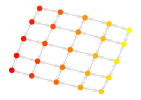

In [5]:
using Graphs
using GraphPlot
using Colors

# Plot the graph
gplot(graph, nodefillc=range(colorant"yellow", stop=colorant"red", length=nv(graph)))

on veut la moyenne du assembly index (ou juste des integers) pour chacun des chemostats, en fonction de la distance from source

# load the AI CSV

In [4]:
using CSV
using DataFrames

# Specify the path to the CSV file
file_path = "./data/Assembly-10000.csv"

# Read the CSV file into a DataFrame
AI_df = CSV.read(file_path, DataFrame) ;

# plot of AI(I)

In [7]:
x = AI_df[:, :integer]
# y = log2.(20x)
y = log2(20) .+ log2.(x)
p = plot(x, y, color=:blue, linestyle=:dash, linewidth=2,
        title="Assembly Index of integers",
        xlabel="Integers", ylabel="Assembly Index", 
        ylim=(0, 20),
        legend=:none)

y = AI_df[:, :assemblyindex]
scatter!(x, y, markersize=2, marker=:x, color=:black)

y = log2.(x)
plot!(x, y, color=:red, linestyle=:dash, linewidth=2)

annotate!(3700, 10, "Lower bound")
annotate!(1200, 17, "Higher bound")

display(p)

UndefVarError: UndefVarError: `plot` not defined

# Plot of $\mu_i(D)$

In [8]:
using CSV, DataFrames

nreact = 25

timeseries_df = CSV.read("./data/sims.02L/000100/timeseries.csv", DataFrame)
t500_df = filter(row -> row[:time] == 100, timeseries_df)
# display(t500_df)

int_avg_arr = []

for i in 1:nreact
    react_df = filter(row -> row[:reactor] == i, t500_df)
    
    int_avg = 0
    for row in eachrow(react_df)
        int_avg += row.variable * row.value
    end
    int_avg = int_avg / sum(react_df.value)

    push!(int_avg_arr, int_avg)
end

println(int_avg_arr)

Any[10.540476190476191, 15.6470207253886, 22.610016420361248, 21.835315645013722, 23.225490196078432, 15.909206349206348, 20.427662037037038, 23.424180327868854, 27.251466275659823, 22.1611328125, 21.580566801619433, 24.839471855455177, 25.009916094584288, 25.83528493364559, 24.390562248995984, 23.802843601895734, 23.91130820399113, 27.192818110850897, 26.920295809367296, 24.79564315352697, 22.323287671232876, 23.577437858508603, 26.44401913875598, 24.912815126050422, 24.96546762589928]


In [9]:
dijkstra_result = dijkstra_shortest_paths(graph, 1)

dist = []
for i in 1:25
    shortest_distance = dijkstra_result.dists[i]
    push!(dist, shortest_distance)
end

println(dist)

Any[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 8]


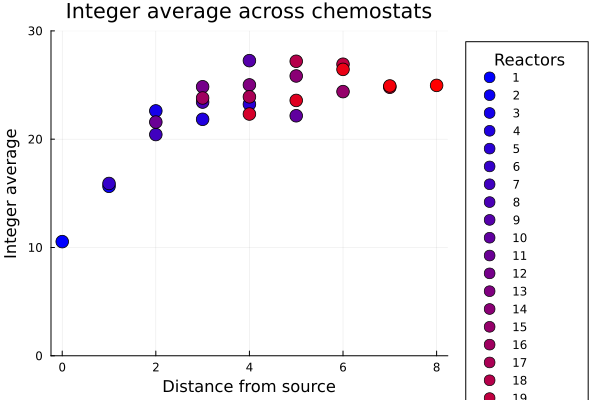

In [10]:
using Plots

s = scatter(title="Integer average across chemostats", legendtitle="Reactors", legend=:outertopright)
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

for i in 1:25
    scatter!(s, [dist[i]], [int_avg_arr[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Distance from source", ylabel="Integer average", label="$i", markersize=7, ylim=(0,30))
end

display(s)

# Plot of $AI(D)$

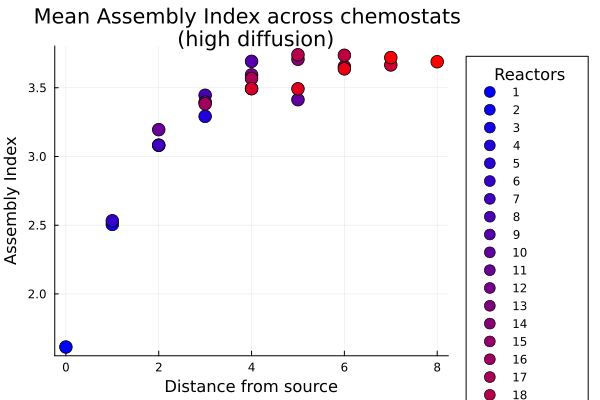

Any[1.6136904761904762, 2.5058290155440415, 3.08128078817734, 3.2918572735590117, 3.4943977591036415, 2.532063492063492, 3.082175925925926, 3.4453551912568305, 3.69208211143695, 3.4130859375, 3.195141700404858, 3.396108408617095, 3.593440122044241, 3.7072599531615924, 3.6536144578313254, 3.3829383886255924, 3.566888396156689, 3.740046838407494, 3.736236647493837, 3.6659751037344397, 3.493150684931507, 3.4923518164435947, 3.6373205741626795, 3.7195378151260505, 3.689208633093525]
Any[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5, 6, 7, 8]


In [11]:
using CSV, DataFrames

nreact = 25

timeseries_df = CSV.read("./data/sims.02L/000100/timeseries.csv", DataFrame)
t500_df = filter(row -> row[:time] == 100, timeseries_df)
# display(t500_df)

AI_avg_arr = []

for i in 1:nreact
    react_df = filter(row -> row[:reactor] == i, t500_df)
    
    AI_avg = 0
    for ts_row in eachrow(react_df)
        ###################
        # replace variable by AI
        filtered_AI_df = filter(row -> row.integer == ts_row.variable, AI_df)
        ts_row.variable = filtered_AI_df[1, :assemblyindex]
        ###################
        AI_avg += ts_row.variable * ts_row.value
    end
    AI_avg = AI_avg / sum(react_df.value)

    push!(AI_avg_arr, AI_avg)
end

println(AI_avg_arr)

dijkstra_result = dijkstra_shortest_paths(graph, 1)

dist = []
for i in 1:25
    shortest_distance = dijkstra_result.dists[i]
    push!(dist, shortest_distance)
end

println(dist)

using Plots

s = scatter(title="Mean Assembly Index across chemostats \n (high diffusion)", legendtitle="Reactors", legend=:outertopright)
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

for i in 1:25
    scatter!(s, [dist[i]], [AI_avg_arr[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Distance from source", ylabel="Assembly Index", label="$i", markersize=7)
end

display(s)

# Plot of $\mu_I(D)$ for three diffusion regimes

can’t calculate the AI as we have integers > 10000

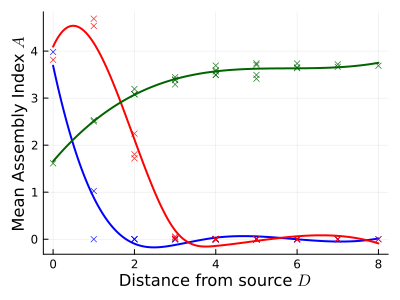

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/03_AI-vs-C/plots/AI-vs-D.pdf"

In [59]:
using CSV, DataFrames, Plots, LaTeXStrings

# fn_arr = ["000001", "000050", "000100"]
fn_arr = ["000030", "000058", "000100"]
colors1 = [:blue, :red, :darkgreen]
colors2 = cgrad([:darkgreen, :lightgreen])

title = "Mean Integer across chemostats \n for three diffusion regimes"
s3 = scatter(size=(400,300), legendtitle="Reactors", legend=:none) #, xlim=(-0.25,4.5), ylim=(8e-1, 8e0))

for f in 1:3

    fn = fn_arr[f]

    nreact = 25

    timeseries_df = CSV.read("./data/sims.02L/$fn/timeseries.csv", DataFrame)
    t500_df = filter(row -> row[:time] == 100, timeseries_df)
    # display(t500_df)
    
    mu_avg_arr = []
    sig_avg_arr = []
    
    for i in 1:nreact
        react_df = filter(row -> row[:reactor] == i, t500_df)
        
        mu_avg = 0
        sig_avg = 0
        mu_var = []
        mu_val = []
        for ts_row in eachrow(react_df)
            ###################
            # replace variable by AI
            if ts_row.variable > 9999
                int_skip = ts_row.variable
                freq_skip = filtered_AI_df[1, :assemblyindex]
                println("capping integer $int_skip with frequency $freq_skip")
                # println(ts_row.variable)
                # println(filtered_AI_df)
                ts_row.variable = 9999
            end
            filtered_AI_df = filter(row -> row.integer == ts_row.variable, AI_df)
            ts_row.variable = filtered_AI_df[1, :assemblyindex]
            ###################
            # mu_avg += ts_row.variable * ts_row.value
            push!(mu_var, ts_row.variable)
            push!(mu_val, ts_row.value)
        end
        # mu_avg = mu_avg / sum(react_df.value)

        if length(mu_var) > 0
            # println("mu_var = $mu_var")
            # println("mu_val = $mu_val")
            weighted_sum = sum(mu_var .* mu_val)
            total_occurrences = sum(mu_val)
            mean = weighted_sum / total_occurrences
            mu_avg = mean

            squared_deviations = (mu_var .- mean) .^ 2
            weighted_squared_deviations = squared_deviations .* mu_val
            variance = sum(weighted_squared_deviations) / total_occurrences
            standard_deviation = sqrt(variance)
            sig_avg = standard_deviation
        else
            mu_avg = 0
            sig_avg = 0
        end

        # this_d = dist[i]
        # println("reactor $i with D=$this_d has mean $mu_avg")
        push!(mu_avg_arr, mu_avg)
        push!(sig_avg_arr, sig_avg)
    end
    
    # println(mu_avg_arr)
    
    dijkstra_result = dijkstra_shortest_paths(graph, 1)
    
    dist = []
    for i in 1:25
        shortest_distance = dijkstra_result.dists[i]
        push!(dist, shortest_distance)
    end
    
    # println(dist)
    
    using Plots
    
    linear_blue_to_red = cgrad([:blue, :red], scale=:linear)
    
    # for i in 1:25
    #     # scatter!(s3, [dist[i]], [mu_avg_arr[i]], color=colors[f], colorbar=false,
    #     # xlabel="Distance from source", ylabel="Integer Mean " * L"\mu_I", label="$i", marker=:x, markerstrokewidth=5, markersize=7)

    #     # plot!(s3, dist, mu_avg_arr, color=colors1[f], markerstrokecolor=colors1[f], colorbar=false, label="$i", xlabel="Distance from source " * L"D", ylabel="Mean Assembly Index " * L"A")

    #     # plot!(s3, dist, mu_avg_arr, yerr = sig_avg_arr, color=colors1[f], markerstrokecolor=colors1[f], colorbar=false, lw=1, linealpha=0.1, markerstrokewidth=1)

    #     scatter!(s3, dist, mu_avg_arr, color=colors1[f], markerstrokecolor=colors1[f], colorbar=false, markersize=3,
    #     label="$i", xlabel="Distance from source " * L"D", ylabel="Mean Assembly Index " * L"A")
        
    #     # lower_bound = mu_avg_arr - sig_avg_arr
    #     # upper_bound = mu_avg_arr + sig_avg_arr
    #     # plot!(s3, dist, upper_bound, fillrange=lower_bound, linealpha=0, fillalpha=0.1, color=colors1[f], label=:none, linewidth=0)
    # end

    scatter!(s3, dist, mu_avg_arr, color=colors1[f], markerstrokecolor=colors1[f], colorbar=false, markersize=3, marker=:x,
        xlabel="Distance from source " * L"D", ylabel="Mean Assembly Index " * L"A")
    
    using Dierckx
    x = dist
    y = mu_avg_arr
    # println(x)
    # println(y)
    p = sortperm(x)
    x = x[p]
    y = y[p]
    xfine = range(0,8,1000)
    smoothing_param = 1.0
    spl = Spline1D(x, y, s=smoothing_param)
    plot!(s3, xfine, spl.(xfine), linewidth=2, color=colors1[f])

end

# annotate!(4, 8, text("Low diffusion", color=:blue, :right))
# annotate!(4, 4, text("Intermediate diffusion", color=:red, :right))
# annotate!(4, 2, text("High diffusion", color=:green, :right))

annotate!(0, 13, text(L"k_d \simeq 10^{-6}", 12, color=:blue, :left))
annotate!(0, 15, text(L"k_d \simeq 10^{-4}", 12, color=:red, :left))
annotate!(0, 17, text(L"k_d \simeq 10^{-1}", 12, color=:darkgreen, :left))

x_range = -1:0.01:5
y_min = 5
y_max = 50
# plot!(x_range, fill(y_min, length(x_range)), fillrange=fill(y_max, length(x_range)), fillcolor=:lightgray, fillalpha=0.25, linecolor=:transparent)

# display(s3)

############## inset
# plot!(s3, legend=:outerright,  xlim=(-0.5,4.5), ylim=(2.1, 4.2),
# frame=:box, inset=bbox(0.55,0.64,0.35, 0.30, :bottom, :left), subplot=2)

# for i in 1:25
#     scatter!(s3[2], [dist[i]], [AI_avg_arr[i]], marker_z=i, color=colors2, colorbar=false,
#     xlabel="Distance from source " * L"D", ylabel="Mean Assembly Index " * L"A", label="$i", markersize=5, legendfontsize=6, guidefontsize=6)
# end

# annotate!(s3[2], 0, 3.8, text("High diffusion", 8, color=:darkgreen, :left))
# annotate!(s3[2], 4.3, 4.50, text("Reactor", :left, 8, color=:black))
#########################

display(s3)

mkpath("./plots")
savefig("./plots/AI-vs-D.pdf")

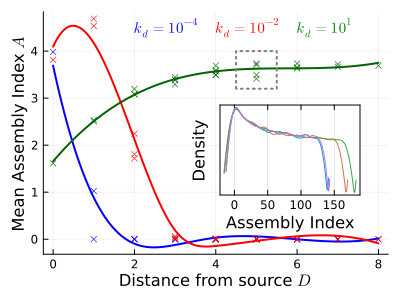

"/Users/alexandre/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/milestones/03_AI-vs-C/plots/AI-vs-D.pdf"

In [131]:
using CSV, DataFrames, Plots, LaTeXStrings

# fn_arr = ["000001", "000050", "000100"]
fn_arr = ["000030", "000058", "000100"]
colors1 = [:blue, :red, :darkgreen]
colors2 = cgrad([:darkgreen, :lightgreen])

fn = fn_arr[3]

nreact = 25

dijkstra_result = dijkstra_shortest_paths(graph, 1)
dist = zeros(Int, (25,2))
for i in 1:25
    shortest_distance = dijkstra_result.dists[i]
    dist[i,1] = i
    dist[i,2] = shortest_distance
    # push!(dist, shortest_distance)
end

fdist = filter(row -> row[2] == 5, eachrow(dist))
f = []

for i in 1:length(fdist)
    push!(f,fdist[i][1])
end

# for ff in f
#     println(ff)
# end

timeseries_df = CSV.read("./data/sims.02L/$fn/timeseries.csv", DataFrame)
t500_df = filter(row -> row[:time] == 100, timeseries_df)

data = []
for i in f
    react_df = filter(row -> row[:reactor] == i, t500_df)
    # Extract the data
    variables = react_df.variable
    values = react_df.value

    # Initialize an empty array to store expanded data
    expanded_data = Int[]

    # Loop through each row in the DataFrame and repeat the variable according to its frequency
    for row in eachrow(react_df)
        append!(expanded_data, repeat([row.variable], row.value))
    end

    # Plot the histogram
    # h = histogram(expanded_data, bins=30, xlabel="Variable", ylabel="Frequency", title="Histogram of Variables")
    push!(data, expanded_data)

    
end

s3new = deepcopy(s3)

x_coords = [4.5, 4.5, 5.5, 5.5, 4.5]
y_coords = [3.2, 4, 4, 3.2, 3.2]
plot!(s3new, x_coords, y_coords, seriestype = :path, ls=:dot, lw = 2, lc = :grey)

####### inset
# plot!(s3, legend=:outerright,
# frame=:box, inset=bbox(0.55,0.64,0.35, 0.30, :bottom, :left), subplot=2)
StatsPlots.density!(s3new, legend=:none, framestyle=:box, framestylecolor=:red, inset=bbox(0.55,0.35,0.35, 0.30, :bottom, :left), subplot=2)
########



using StatsPlots

# s = StatsPlots.density()
for i in 1:4
    using CategoricalArrays
    expanded_data_cat = categorical(data[i])
    # println(expanded_data_cat)

    # Plot the density curve
    # plot(expanded_data_cat, seriestype=:density, xlabel="Variable", ylabel="Density", title="Density Plot of Variables")
    StatsPlots.density!(s3new[2], expanded_data_cat, xlabel="Assembly Index", ylabel="Density", linewidth=1, yscale=:log10) # this is the one
    # h = histogram(data[1], bins=30, xlabel="Variable", ylabel="Frequency", title="Histogram of Variables")
    # display(h)
end

annotate!(s3new[1], 2, 4.5, text(L"k_d = 10^{-4}", 10, color=:blue, :left))
annotate!(s3new[1], 4, 4.5, text(L"k_d = 10^{-2}", 10, color=:red, :left))
annotate!(s3new[1], 6, 4.5, text(L"k_d = 10^{1}", 10, color=:green, :left))

# annotate!(s3new[1], -0.15, 0.3, text(L"k_d = 10^{-4}", 8, color=:blue, :left))
# annotate!(s3new[1], 1.6, 4, text(L"k_d = 10^{-2}", 8, color=:red, :left))
# annotate!(s3new[1], 6.5, 4.3, text(L"k_d = 10^{1}", 8, color=:green, :left))
display(s3new)

mkpath("./plots")
savefig(s3new, "./plots/AI-vs-D.pdf")

# # expanded_data_cat = categorical(data[1])
# h = histogram(data[1], bins=30)
# display(h)

# p = plot(data[1], seriestype = :stephist)
# display(p)



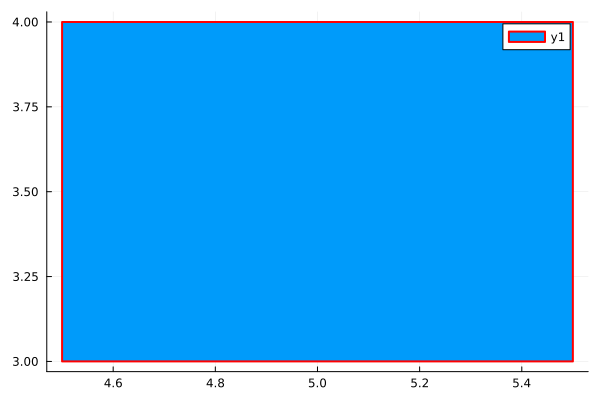

In [87]:
using Plots

# Define the coordinates of the rectangle




In [85]:
import Pkg; Pkg.add("CategoricalArrays")
import Pkg; Pkg.add("StatsPlots")

   Resolving package versions...
  No Changes to `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Project.toml`
  No Changes to `~/Documents/academic/3-research/projects/2023 spatial-topology/flow-complexity/Manifest.toml`
   Resolving package versions...
   Installed MKL_jll ─────────── v2024.2.0+0
   Installed Distances ───────── v0.10.11
   Installed FFTW ────────────── v1.8.0
   Installed IntelOpenMP_jll ─── v2024.2.1+0
   Installed oneTBB_jll ──────── v2021.12.0+0
   Installed NearestNeighbors ── v0.4.20
   Installed AbstractFFTs ────── v1.5.0
   Installed FFTW_jll ────────── v3.3.10+1
   Installed Arpack_jll ──────── v3.5.1+1
   Installed StatsPlots ──────── v0.15.7
   Installed Arpack ──────────── v0.5.4
   Installed KernelDensity ───── v0.6.9
   Installed Widgets ─────────── v0.6.6
   Installed MultivariateStats ─ v0.10.3
   Installed TableOperations ─── v1.2.0
   Installed Observables ─────── v0.5.5
   Installed Clustering ──────── v0.15.7
    Up

In [326]:
vals = exp10.(LinRange(-6,-1,100))
println(vals[1])
println(vals[50])
println(vals[100])

1.0e-6
0.0002983647240283343
0.1


# Plot of $\mu_I(C)$ for one simulation

In [15]:
deg = degree(graph)

25-element Vector{Int64}:
 4
 6
 6
 6
 4
 6
 8
 8
 8
 6
 ⋮
 8
 8
 8
 6
 4
 6
 6
 6
 4

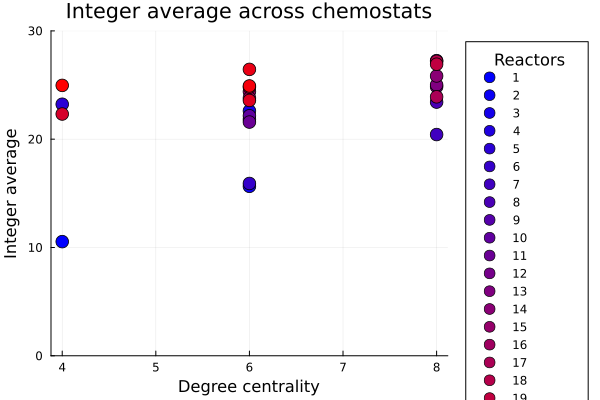

In [16]:
using Plots

s = scatter(title="Integer average across chemostats", legendtitle="Reactors", legend=:outertopright)
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

for i in 1:25
    scatter!(s, [deg[i]], [int_avg_arr[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Degree centrality", ylabel="Integer average", label="$i", markersize=7, ylim=(0,30))
end

display(s)

# Plot of $\mu_I(C)$ for three diffusion regimes

Any[805.3343407631281, 1.0, NaN, 1.0, NaN, NaN, NaN, NaN, NaN]
Any[0, 1, 2, 1, 2, 3, 2, 3, 4]
Any[760.8730754787833, 49.36950146627566, 1.2731854838709677, 41.71275559883155, 1.5045871559633028, 1.0, 1.047713717693837, 1.0, 1.0]
Any[0, 1, 2, 1, 2, 3, 2, 3, 4]
Any[13.591068301225919, 15.94083969465649, 9.008676789587852, 17.508982035928145, 17.479666319082376, 16.87231968810916, 8.457609805924413, 15.92360430950049, 27.857522123893805]
Any[0, 1, 2, 1, 2, 3, 2, 3, 4]


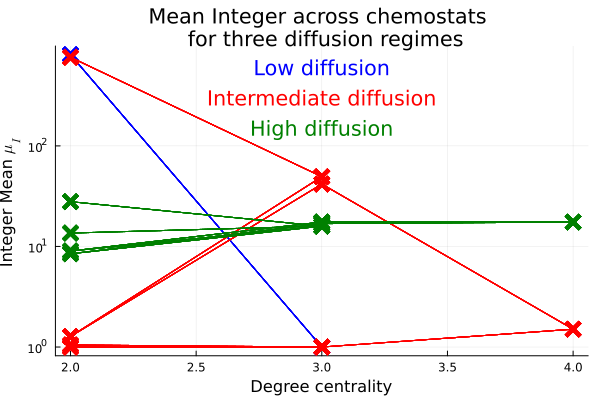

In [204]:
using CSV, DataFrames, Plots, LaTeXStrings

fn_arr = ["000001", "000050", "000100"]
colors = [:blue, :red, :green]

s = scatter(title="Mean Integer across chemostats \n for three diffusion regimes", legendtitle="Reactors", legend=:none, yscale=:log)

for f in 1:3

    fn = fn_arr[f]

    nreact = 9

    timeseries_df = CSV.read("./data/sims/$fn/timeseries.csv", DataFrame)
    t500_df = filter(row -> row[:time] == 500, timeseries_df)
    # display(t500_df)
    
    mu_avg_arr = []
    
    for i in 1:nreact
        react_df = filter(row -> row[:reactor] == i, t500_df)
        
        mu_avg = 0
        for ts_row in eachrow(react_df)
            ###################
            # replace variable by AI
            # filtered_AI_df = filter(row -> row.integer == ts_row.variable, AI_df)
            # println(ts_row.variable)
            # println(filtered_AI_df)
            # ts_row.variable = filtered_AI_df[1, :assemblyindex]
            ###################
            mu_avg += ts_row.variable * ts_row.value
        end
        mu_avg = mu_avg / sum(react_df.value)
    
        push!(mu_avg_arr, mu_avg)
    end
    
    println(mu_avg_arr)
    
    dijkstra_result = dijkstra_shortest_paths(graph, 1)
    
    dist = []
    for i in 1:9
        shortest_distance = dijkstra_result.dists[i]
        push!(dist, shortest_distance)
    end
    
    println(dist)
    
    using Plots
    
    linear_blue_to_red = cgrad([:blue, :red], scale=:linear)
    
    for i in 1:9
        # scatter!(s, [dist[i]], [mu_avg_arr[i]], color=colors[f], colorbar=false,
        # xlabel="Distance from source", ylabel="Integer Mean " * L"\mu_I", label="$i", marker=:x, markerstrokewidth=5, markersize=7)
        plot!(s, deg, mu_avg_arr, color=colors[f], colorbar=false,
        xlabel="Degree centrality", ylabel="Integer Mean " * L"\mu_I", label="$i", marker=:x, markerstrokewidth=5, markersize=7)
    end

end

annotate!(3, 600, text("Low diffusion", color=:blue))
annotate!(3, 300, text("Intermediate diffusion", color=:red))
annotate!(3, 150, text("High diffusion", color=:green))

display(s)

# Plot of $AI(C)$

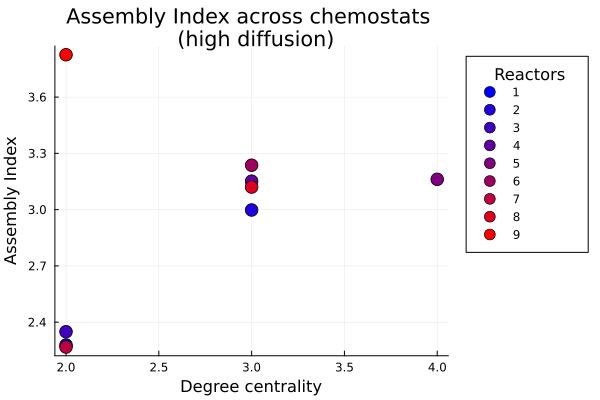

In [206]:
using Plots

s = scatter(title="Assembly Index across chemostats \n (high diffusion)", legendtitle="Reactors", legend=:outertopright)
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

for i in 1:9
    scatter!(s, [deg[i]], [AI_avg_arr[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Degree centrality", ylabel="Assembly Index", label="$i", markersize=7)
end

display(s)

# 3d plot

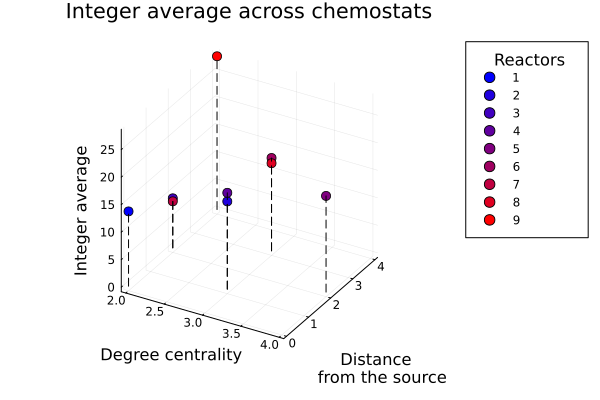

In [58]:
using Plots

s3 = scatter3d(title="Integer average across chemostats", legendtitle="Reactors", legend=:outertopright)
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

x = deg
y = dist
z = int_avg_arr

for i in 1:9
    scatter3d!(s3, [x[i]], [y[i]], [z[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Degree centrality", ylabel="Distance \n from the source", zlabel="Integer average", label="$i", markersize=5)
end

# Add vertical lines
for i in 1:length(x)
    plot!([x[i], x[i]], [y[i], y[i]], [0, z[i]], label="", color=:black, linestyle=:dash)
end

display(s3)

# playground below

In [ ]:
using Plots

# Create the scatter plot
s3 = scatter3d(title="Integer average across chemostats", legendtitle="Reactors", legend=:outertopright, size=(600, 400))
linear_blue_to_red = cgrad([:blue, :red], scale=:linear)

# Sample data
x = deg
y = dist
z = int_avg_arr

# Plot the scatter points
for i in 1:9
    scatter3d!(s3, [x[i]], [y[i]], [z[i]], marker_z=i, color=linear_blue_to_red, colorbar=false,
    xlabel="Degree centrality", ylabel="Distance\nfrom the source", zlabel="Integer average", label="$i", markersize=3)
end

# Add vertical lines
for i in 1:length(x)
    plot!([x[i], x[i]], [y[i], y[i]], [0, z[i]], label="", color=:black, linestyle=:dash)
end

# Display the plot
display(s3)

In [31]:
vals = exp10.(LinRange(-6,1,100))

for i in 1:100
    val = vals[i]
    println("value $i = $val")
end

value 1 = 1.0e-6
value 2 = 1.1768119524349991e-6
value 3 = 1.3848863713938717e-6
value 4 = 1.6297508346206435e-6
value 5 = 1.917910261672489e-6
value 6 = 2.2570197196339167e-6
value 7 = 2.656087782946684e-6
value 8 = 3.1257158496882352e-6
value 9 = 3.6783797718286267e-6
value 10 = 4.328761281083061e-6
value 11 = 5.0941380148163755e-6
value 12 = 5.994842503189409e-6
value 13 = 7.0548023107186455e-6
value 14 = 8.302175681319735e-6
value 15 = 9.770099572992246e-6
value 16 = 1.1497569953977357e-5
value 17 = 1.3530477745798076e-5
value 18 = 1.5922827933410938e-5
value 19 = 1.8738174228603867e-5
value 20 = 2.2051307399030455e-5
value 21 = 2.5950242113997373e-5
value 22 = 3.053855508833419e-5
value 23 = 3.5938136638046256e-5
value 24 = 4.229242874389499e-5
value 25 = 4.977023564332114e-5
value 26 = 5.8570208180566735e-5
value 27 = 6.89261210434971e-5
value 28 = 8.111308307896872e-5
value 29 = 9.545484566618347e-5
value 30 = 0.00011233240329780277
value 31 = 0.00013219411484660301
value 32 = 0